## Import all necessary modules

In [1]:
import json
import string
import nltk
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from PIL import Image

## Import article from json file

In [2]:
json_file = open("data/article_1.json", "r")
data = json.load(json_file)
article = data['Text']

## Tokenization

In [3]:
tokens = word_tokenize(article)
unique_tokens = set(tokens)

## Frequency distribution of words

Frequency of most common 30 words:
[('.', 76), (',', 75), ('the', 65), ('a', 58), ('of', 47), ('to', 39), ('I', 37), ('in', 29), ('and', 28), ('my', 25), ('’', 23), ('“', 23), ('”', 23), ('gluten', 18), ('was', 18), ('that', 17), ('it', 16), ('with', 13), ('you', 13), ('from', 10), ('me', 10), ('like', 10), ('as', 10), ('had', 10), ('your', 10), ('when', 9), ('s', 9), ('at', 9), ('food', 8), ('?', 8)]


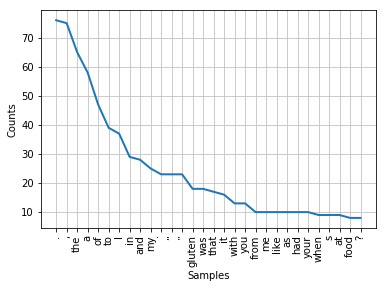

In [4]:
fd = nltk.FreqDist(tokens)
print("Frequency of most common 30 words:")
print(fd.most_common(30))
fd.plot(30)

## Frequency distribution of length of unique words

Frequency of all word lengths:
{5: 120, 9: 49, 2: 38, 7: 98, 4: 133, 11: 28, 1: 20, 6: 110, 3: 79, 8: 69, 12: 12, 14: 6, 10: 37, 13: 12, 21: 1, 20: 1, 15: 1, 16: 1}


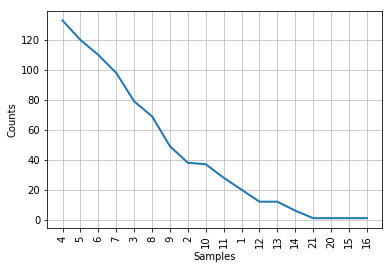

In [5]:
fd_wordlength = nltk.FreqDist([len(w) for w in unique_tokens])
print("Frequency of all word lengths:")
print(dict(fd_wordlength))
fd_wordlength.plot()

## Remove punctuations

In [6]:
# Default built-in punctuation list
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
tokens_no_punctuation = [t for t in tokens if t not in string.punctuation]
print('Number of tokens without punctuation: ', len(tokens_no_punctuation))
print('First 30 items in tokens without punctuation: ', tokens_no_punctuation[:30])

Number of tokens without punctuation:  1681
First 30 items in tokens without punctuation:  ['Gluten', 'it', 'turns', 'out', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', 'made', 'of', 'two', 'proteins', 'that', 'gives', 'dough', 'its', 'elasticity', 'Celiac', 'is', 'an', 'autoimmune', 'disorder', 'in']


In [8]:
print('Number of tokens: ', len(tokens))
print('First 30 items in tokens: ', tokens[:30])

Number of tokens:  1855
First 30 items in tokens:  ['Gluten', ',', 'it', 'turns', 'out', ',', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', ',', 'made', 'of', 'two', 'proteins', ',', 'that', 'gives', 'dough', 'its', 'elasticity', '.', 'Celiac']


In [9]:
# Convert to lowercase
tokens_lower = [t.lower() for t in tokens_no_punctuation]

## Remove stopwords

In [10]:
# Default stopwords from nltk
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [11]:
# Take only non-stopword token
sw = stopwords.words('english')
tokens_nostop = [t for t in tokens_lower if t not in sw ]
print('Number of tokens without stopwords & punctuation: ', len(tokens_nostop))
print('First 30 items in tokens without stopwords & punctuation: ', tokens_nostop[:30])

Number of tokens without stopwords & punctuation:  926
First 30 items in tokens without stopwords & punctuation:  ['gluten', 'turns', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'proteins', 'gives', 'dough', 'elasticity', 'celiac', 'autoimmune', 'disorder', 'gluten', 'wreaks', 'havoc', 'small', 'intestine', 'blocking', 'nutrients', 'absorbed', 'diagnosed', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheaty']


## Stemming (Porter, Lancaster, Snowball)

In [12]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
snowball = nltk.SnowballStemmer('english')

tokens_porter = [ porter.stem(t) for t in tokens_nostop ] 
tokens_lancaster = [ lancaster.stem(t) for t in tokens_nostop ]
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]

## Lemmatization

In [13]:
wnl = nltk.WordNetLemmatizer()
tokens_lemmatize = [ wnl.lemmatize(t) for t in tokens_nostop ]

## Comparison between Stemming & Lemmatization

In [14]:
df = pd.DataFrame(list(zip(tokens_nostop, 
                   tokens_porter,
                   tokens_lancaster, 
                   tokens_snow,
                   tokens_lemmatize)))
df.columns = ['Original Token', 'PorterStemmer', 'LancasterStemmer', 'SnowballStemmer', 'WordNetLemmatizer']
df.head(30)

,Original Token,PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer
0,gluten,gluten,glut,gluten,gluten
1,turns,turn,turn,turn,turn
2,actual,actual,act,actual,actual
3,grain,grain,grain,grain,grain
4,visible,visibl,vis,visibl,visible
5,ingredient,ingredi,ingredy,ingredi,ingredient
6,substance,substanc,subst,substanc,substance
7,made,made,mad,made,made
8,two,two,two,two,two
9,proteins,protein,protein,protein,protein


## Cleaning (Take only words with length >= 3)

Frequency of most common 30 clean words:
[('gluten', 23), ('like', 10), ('food', 9), ('gluten-fre', 7), ('ask', 6), ('celiac', 5), ('would', 5), ('one', 5), ('percent', 5), ('first', 5), ('way', 5), ('allergi', 5), ('waiter', 5), ('eat', 4), ('heard', 4), ('word', 4), ('year', 4), ('mayb', 4), ('turn', 3), ('ingredi', 3), ('made', 3), ('small', 3), ('doctor', 3), ('never', 3), ('could', 3), ('mom', 3), ('sandwich', 3), ('tini', 3), ('feel', 3), ('diet', 3)]


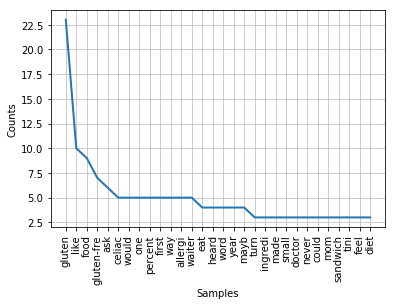

In [15]:
tokens_clean = [ t for t in tokens_snow if len(t) >= 3 ]
fd_clean = nltk.FreqDist(tokens_clean)
print("Frequency of most common 30 clean words:")
print(fd_clean.most_common(30))
fd_clean.plot(30)

## Generate Word Cloud from frequency distribution

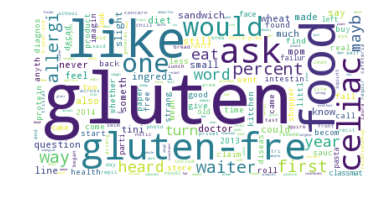

In [16]:
wc_from_fd = WordCloud(background_color="white")
wc_from_fd.generate_from_frequencies(fd_clean)
plt.imshow(wc_from_fd, interpolation='bilinear')
plt.axis("off")
plt.show()

## Generate Word Cloud from string

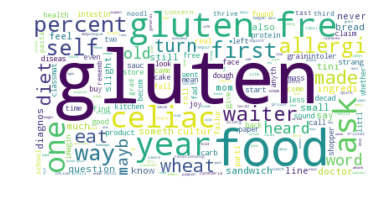

In [17]:
text_clean=" ".join(tokens_clean)
wc_from_str = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc_from_str, interpolation='bilinear')
plt.axis("off")
plt.show()